<a href="https://colab.research.google.com/github/Sheraz55/Deep-learning-course-practice/blob/main/Disease_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from keras.engine.base_layer import Layer
from tensorflow.keras import models, layers
import os
import pandas as np
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import Model

In [30]:
BATCH_SIZE = 10
image_height = 255
image_width =255
channels = 3
EPOCHS = 20

In [31]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Potato/Raw data',
    shuffle = True,
    image_size = (image_height, image_width),
    batch_size = BATCH_SIZE
    
)

Found 300 files belonging to 3 classes.


In [32]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [33]:
len(dataset)

30

In [34]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)

(10, 255, 255, 3)


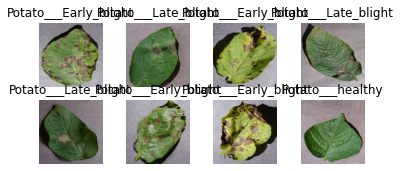

In [35]:
for image_batch, label_batch in dataset.take(1):
  for i in range(8):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')

In [36]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split= 0.1, shuffle = True, shuffle_size = 1000):
  ds_size = len(ds)
  train_size = int(train_split*ds_size)
  val_size = int(val_split*ds_size)

  train_ds = ds.take(train_size)
  
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [37]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [38]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)

In [39]:
resize_and_resclae = tf.keras.Sequential([
                                          layers.experimental.preprocessing.Resizing(image_height, image_width),
                                          layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [40]:
data_augmentation = tf.keras.Sequential([
                                         layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
                                         layers.experimental.preprocessing.RandomRotation(0.2)
])

In [41]:
input_shape = (BATCH_SIZE, image_height, image_width, channels)
n_classes = 3
model = models.Sequential([
                        resize_and_resclae,
                        data_augmentation,
                        layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape ),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64, kernel_size= (3,3) , activation = 'relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64, kernel_size= (3,3) , activation = 'relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64,(3,3), activation = 'relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64,(3,3), activation = 'relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64,(3,3), activation = 'relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Flatten(),
                        layers.Dense(64, activation='relu'),
                        layers.Dense(n_classes, activation='softmax')

])
model.build(input_shape=input_shape)

In [42]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (10, 255, 255, 3)         0         
                                                                 
 sequential_7 (Sequential)   (10, 255, 255, 3)         0         
                                                                 
 conv2d_19 (Conv2D)          (10, 253, 253, 32)        896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (10, 126, 126, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (10, 124, 124, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (10, 62, 62, 64)         0         
 g2D)                                                 

In [45]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
    metrics = ['accuracy']
)

In [47]:
history = model.fit(
    train_ds, 
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/20
24/24 [==============================] - 39s 1s/step - loss: 1.0833 - accuracy: 0.4208 - val_loss: 0.9894 - val_accuracy: 0.4667
Epoch 2/20
24/24 [==============================] - 26s 1s/step - loss: 0.8927 - accuracy: 0.5750 - val_loss: 0.7098 - val_accuracy: 0.6667
Epoch 3/20
24/24 [==============================] - 26s 1s/step - loss: 0.6939 - accuracy: 0.6792 - val_loss: 0.6247 - val_accuracy: 0.7333
Epoch 4/20
24/24 [==============================] - 26s 1s/step - loss: 0.5328 - accuracy: 0.7500 - val_loss: 0.5007 - val_accuracy: 0.7667
Epoch 5/20
24/24 [==============================] - 26s 1s/step - loss: 0.4096 - accuracy: 0.8208 - val_loss: 0.5758 - val_accuracy: 0.8333
Epoch 6/20
24/24 [==============================] - 26s 1s/step - loss: 0.4305 - accuracy: 0.8083 - val_loss: 0.4857 - val_accuracy: 0.8667
Epoch 7/20
24/24 [==============================] - 26s 1s/step - loss: 0.3353 - accuracy: 0.8667 - val_loss: 0.6581 - val_accuracy: 0.8000
Epoch 8/20
24/24 [==

In [50]:
scores = model.evaluate(test_ds)

3/3 [==============================] - 1s 279ms/step - loss: 0.2056 - accuracy: 0.9333


In [51]:
scores

[0.2056414932012558, 0.9333333373069763]

In [52]:
history

In [53]:
history.params

{'epochs': 20, 'steps': 24, 'verbose': 1}

In [54]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and validation Loss')

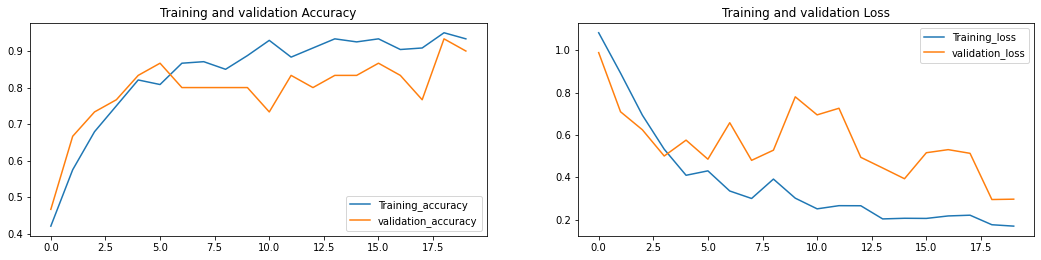

In [66]:
plt.figure(figsize= (18,18))
plt.subplot(4,2,1)
plt.plot(range(EPOCHS), acc, label = 'Training_accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'validation_accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and validation Accuracy')

plt.subplot(4,2,2)
plt.plot(range(EPOCHS), loss, label = 'Training_loss')
plt.plot(range(EPOCHS), val_loss, label = 'validation_loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation Loss')

In [79]:
model.save("my_model.h5")